In [1]:

import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from sklearn.metrics import mean_squared_error
# from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import time	
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline 
from pylab import rcParams

rcParams['figure.dpi'] = 120
rcParams['savefig.dpi'] = 120 
rcParams['font.size'] = 20
import datetime
import os
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('../datasets/sales_train_validation.csv')
print(data.shape)
print(data.info())
print(len(data["item_id"].unique())) # 商品种类
data.head()


(30490, 1919)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30490 entries, 0 to 30489
Columns: 1919 entries, id to d_1913
dtypes: int64(1913), object(6)
memory usage: 446.4+ MB
None
3049


,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,3,0,1,1,1,3,0,1,1
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,2,1,1,1,0,1,1,1
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,5,4,1,0,1,3,7,2
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,1,0,1,1,2,2,2,4


In [3]:
sell_prices = pd.read_csv('../datasets/sell_prices.csv')
print(sell_prices.shape)
print(sell_prices.info())
sell_prices.head()


(6841121, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6841121 entries, 0 to 6841120
Data columns (total 4 columns):
 #   Column      Dtype  
---  ------      -----  
 0   store_id    object 
 1   item_id     object 
 2   wm_yr_wk    int64  
 3   sell_price  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 208.8+ MB
None


,store_id,item_id,wm_yr_wk,sell_price
0,CA_1,HOBBIES_1_001,11325,9.58
1,CA_1,HOBBIES_1_001,11326,9.58
2,CA_1,HOBBIES_1_001,11327,8.26
3,CA_1,HOBBIES_1_001,11328,8.26
4,CA_1,HOBBIES_1_001,11329,8.26


In [4]:
sell_prices[sell_prices.isnull().T.any()]

,store_id,item_id,wm_yr_wk,sell_price


In [7]:
submission = pd.read_csv('../datasets/sample_submission.csv')
print(submission.shape)
print(submission.info())
submission.head()

(771120, 29)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 771120 entries, 0 to 771119
Data columns (total 29 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   id      771120 non-null  object
 1   F1      771120 non-null  int64 
 2   F2      771120 non-null  int64 
 3   F3      771120 non-null  int64 
 4   F4      771120 non-null  int64 
 5   F5      771120 non-null  int64 
 6   F6      771120 non-null  int64 
 7   F7      771120 non-null  int64 
 8   F8      771120 non-null  int64 
 9   F9      771120 non-null  int64 
 10  F10     771120 non-null  int64 
 11  F11     771120 non-null  int64 
 12  F12     771120 non-null  int64 
 13  F13     771120 non-null  int64 
 14  F14     771120 non-null  int64 
 15  F15     771120 non-null  int64 
 16  F16     771120 non-null  int64 
 17  F17     771120 non-null  int64 
 18  F18     771120 non-null  int64 
 19  F19     771120 non-null  int64 
 20  F20     771120 non-null  int64 
 21  F21     771120 non-n

,id,F1,F2,F3,F4,F5,F6,F7,F8,F9,...,F19,F20,F21,F22,F23,F24,F25,F26,F27,F28
0,Total_X_0.005_validation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,CA_X_0.005_validation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,TX_X_0.005_validation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,WI_X_0.005_validation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,CA_1_X_0.005_validation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
calendar = pd.read_csv('../datasets/calendar.csv')
print(calendar.shape)
print(calendar.info())
calendar.head()

(1969, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1969 entries, 0 to 1968
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          1969 non-null   object
 1   wm_yr_wk      1969 non-null   int64 
 2   weekday       1969 non-null   object
 3   wday          1969 non-null   int64 
 4   month         1969 non-null   int64 
 5   year          1969 non-null   int64 
 6   d             1969 non-null   object
 7   event_name_1  162 non-null    object
 8   event_type_1  162 non-null    object
 9   event_name_2  5 non-null      object
 10  event_type_2  5 non-null      object
 11  snap_CA       1969 non-null   int64 
 12  snap_TX       1969 non-null   int64 
 13  snap_WI       1969 non-null   int64 
dtypes: int64(7), object(7)
memory usage: 215.5+ KB
None


,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1


In [36]:
sell_prices.store_id = sell_prices.store_id.astype('category')
sell_prices.item_id = sell_prices.item_id.astype('category')
sell_prices.wm_yr_wk = pd.to_numeric(sell_prices.wm_yr_wk, downcast='unsigned')
sell_prices.sell_price = pd.to_numeric(sell_prices.sell_price, downcast='float')
sell_prices.info()# save memory form 200+Mb to 58Mb

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6841121 entries, 0 to 6841120
Data columns (total 4 columns):
 #   Column      Dtype   
---  ------      -----   
 0   store_id    category
 1   item_id     category
 2   wm_yr_wk    uint16  
 3   sell_price  float32 
dtypes: category(2), float32(1), uint16(1)
memory usage: 58.8 MB


In [37]:
calendar = calendar.fillna('NotEvent')

calendar.date = calendar.date.astype('datetime64')

calendar.wm_yr_wk = pd.to_numeric(calendar.wm_yr_wk, downcast='unsigned')
calendar.weekday = calendar.weekday.astype('category')
calendar.wday = pd.to_numeric(calendar.wday, downcast='unsigned')
calendar.month = pd.to_numeric(calendar.month, downcast='unsigned')
calendar.year = pd.to_numeric(calendar.year, downcast='unsigned')
calendar.d = calendar.d.astype('category')

calendar.event_name_1 = calendar.event_name_1.astype('category')
calendar.event_type_1 = calendar.event_type_1.astype('category')
calendar.event_name_2 = calendar.event_name_2.astype('category')
calendar.event_type_2 = calendar.event_type_2.astype('category')

calendar.snap_CA = calendar.snap_CA.astype('bool')
calendar.snap_TX = calendar.snap_TX.astype('bool')
calendar.snap_WI = calendar.snap_WI.astype('bool')

calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1969 entries, 0 to 1968
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          1969 non-null   datetime64[ns]
 1   wm_yr_wk      1969 non-null   uint16        
 2   weekday       1969 non-null   category      
 3   wday          1969 non-null   uint8         
 4   month         1969 non-null   uint8         
 5   year          1969 non-null   uint16        
 6   d             1969 non-null   category      
 7   event_name_1  1969 non-null   category      
 8   event_type_1  1969 non-null   category      
 9   event_name_2  1969 non-null   category      
 10  event_type_2  1969 non-null   category      
 11  snap_CA       1969 non-null   bool          
 12  snap_TX       1969 non-null   bool          
 13  snap_WI       1969 non-null   bool          
dtypes: bool(3), category(6), datetime64[ns](1), uint16(2), uint8(2)
memory usage: 144.0 KB


In [38]:
data.id = data.id.astype('category')
data.item_id = data.item_id.astype('category')
data.dept_id = data.dept_id.astype('category')
data.cat_id = data.cat_id.astype('category')
data.store_id = data.store_id.astype('category')
data.state_id = data.state_id.astype('category')
# data.d = data.d.astype('category')

# data.sales = pd.to_numeric(data.sales, downcast='unsigned')
# data.day_int = pd.to_numeric(data.day_int, downcast='unsigned')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30490 entries, 0 to 30489
Columns: 1919 entries, id to d_1913
dtypes: category(6), int64(1913)
memory usage: 446.8 MB


In [39]:
days_cols = data.columns[data.columns.str.contains("d_")].values
data_days = data[days_cols]
data_days.head()

,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,0,0,0,0,0,0,0,0,0,0,...,1,3,0,1,1,1,3,0,1,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,2,1,2,1,1,1,0,1,1,1
3,0,0,0,0,0,0,0,0,0,0,...,1,0,5,4,1,0,1,3,7,2
4,0,0,0,0,0,0,0,0,0,0,...,2,1,1,0,1,1,2,2,2,4


In [40]:
level_cols = data.columns[data.columns.str.contains("d_")==False].values
data_level = data[level_cols]
data_level.head()

,id,item_id,dept_id,cat_id,store_id,state_id
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA


0       False
1       False
2       False
3        True
4        True
        ...  
1964    False
1965    False
1966    False
1967    False
1968    False
Name: snap_CA, Length: 1969, dtype: bool

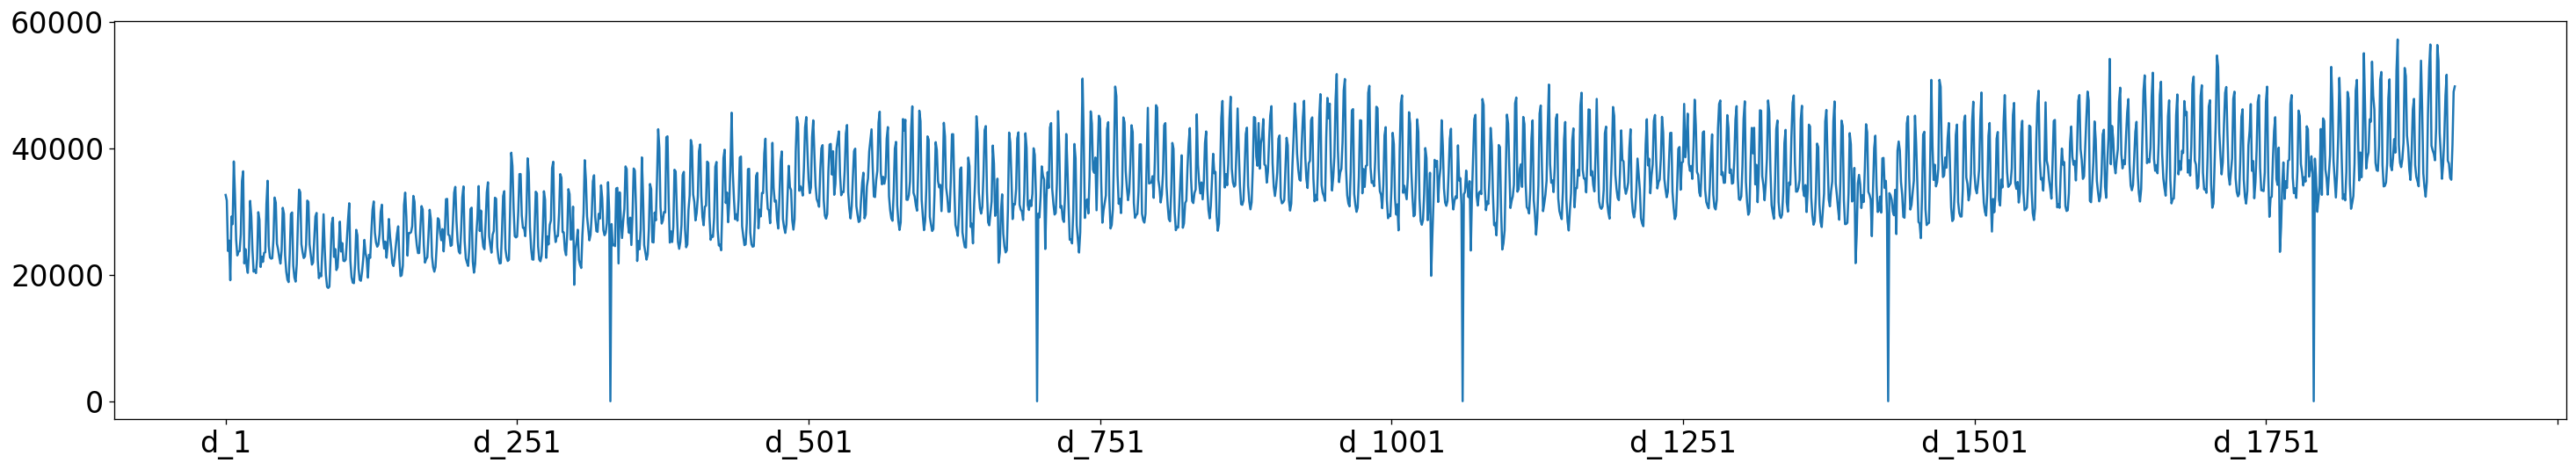

In [98]:
data_days_sales = data_days.sum() # 每日 卖出商品个数； 日销售量
# 每日 所有产品 销售数量
rcParams['figure.figsize'] = (30,5)
data_days_sales.plot()
# data_days_sales

In [43]:
data_days_sales.to_csv("data_days_sales.csv.gz", compression='gzip')

In [12]:
# 日销量最低的几天
lowest_sale = data_days_sales[data_days_sales<100]
lowest_sale

d_331     13
d_697     11
d_1062    20
d_1427    20
d_1792    14
dtype: int64

In [13]:
# lowest_sale.index
period = []
days = []
for i,val in enumerate(lowest_sale.index):
    days.append(int(val[2:]))
    if i+1 < len(lowest_sale.index):
        period.append( int(lowest_sale.index[i+1][2:])-int(lowest_sale.index[i][2:]))
    
print(period) # 周期性 下一次周期在 1792 + 356
end_day = lowest_sale.index[-1].split("_")[1]
next_period= int(end_day) + 356
next_period  # 下一次周期在 2148日，未在接下来预测一个月内。SNAP purchases are not allowed

[366, 365, 365, 365]


2148

#### states

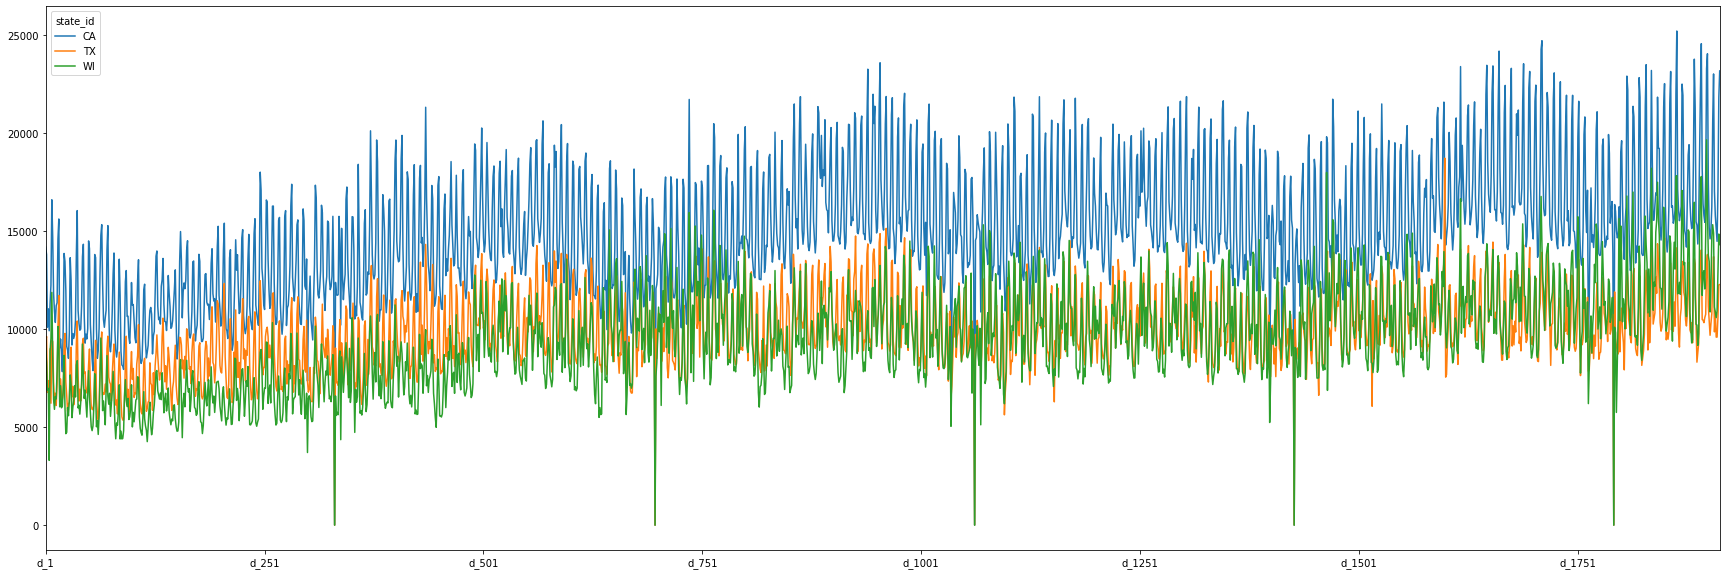

In [14]:
# 各个州每日销量aaa
rcParams['figure.figsize'] = (30,10)
stats_daily_sale =data.groupby("state_id")[days_cols].sum()
stats_daily_sale.transpose().plot()
# stats_daily_sale.transpose().plot(kind='bar') # todo
# ca 销量高，有肯能是拥有4个store # todo

#### stroes

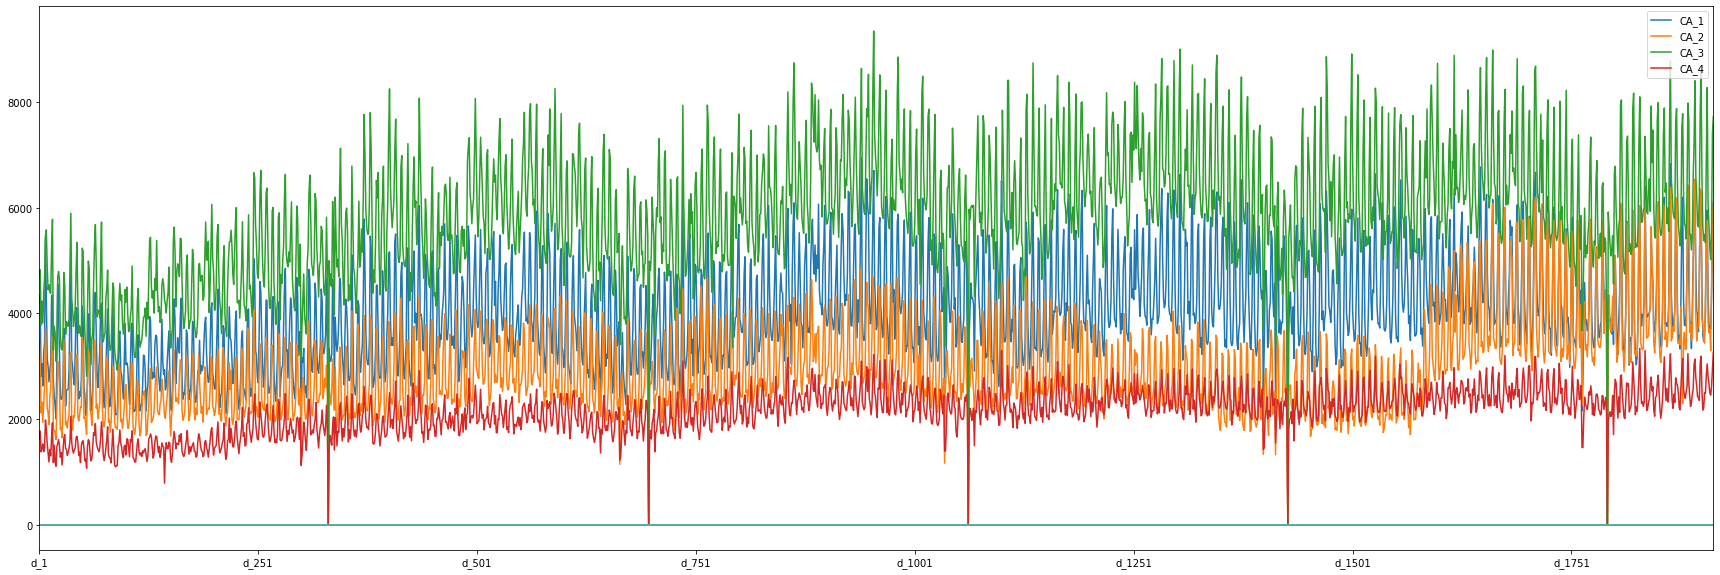

In [15]:
CA = data[data['state_id'] =='CA']
TX = data[data['state_id'] =='TX']
WI = data[data['state_id'] =='WI']
#CA 不同sotre 每日销量 [ 各州 sotre 销量 ]
rcParams['figure.figsize'] = (30,10)
CA.groupby("store_id")[days_cols].sum().transpose().plot()
plt.legend(CA.store_id.unique(),loc='upper right')


#### depts

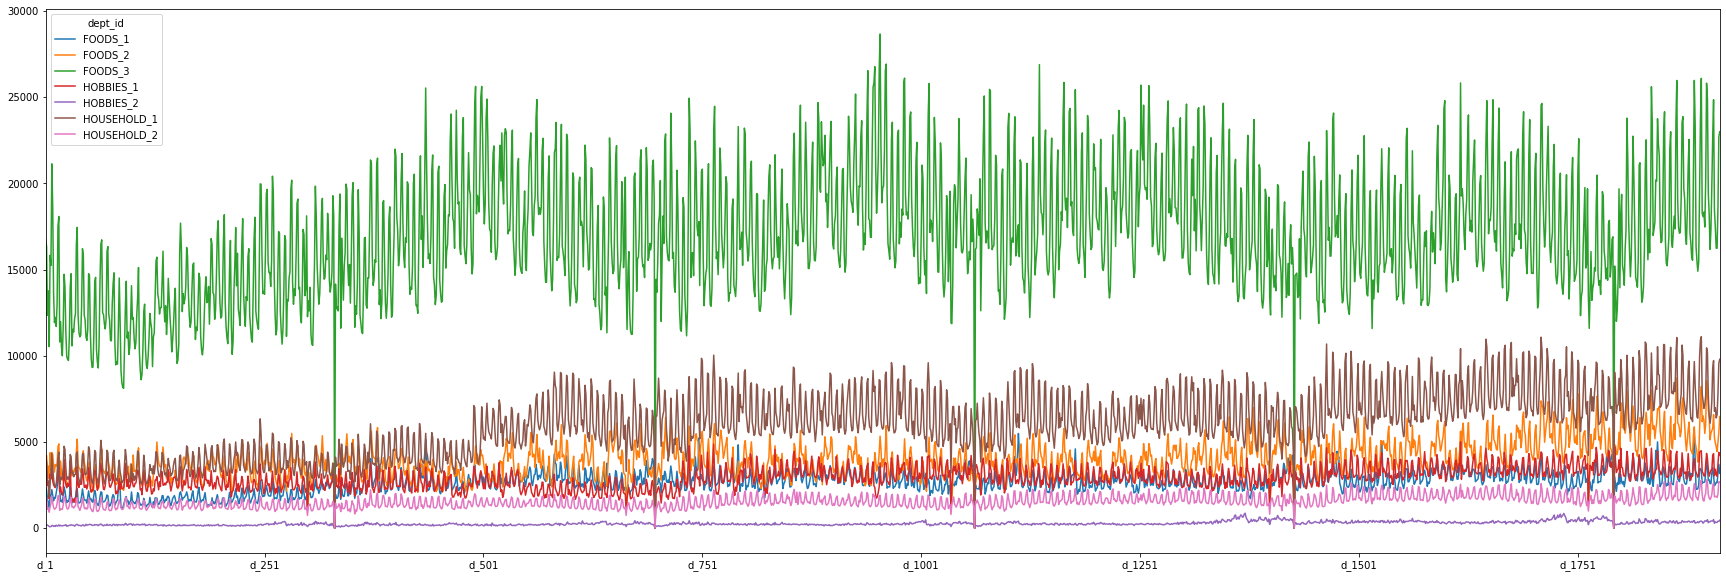

In [16]:
#不同 dept 每日销量 daily top:foods_3 
rcParams['figure.figsize'] = (30,10)
data.groupby("dept_id")[days_cols].sum().transpose().plot()


#### cats

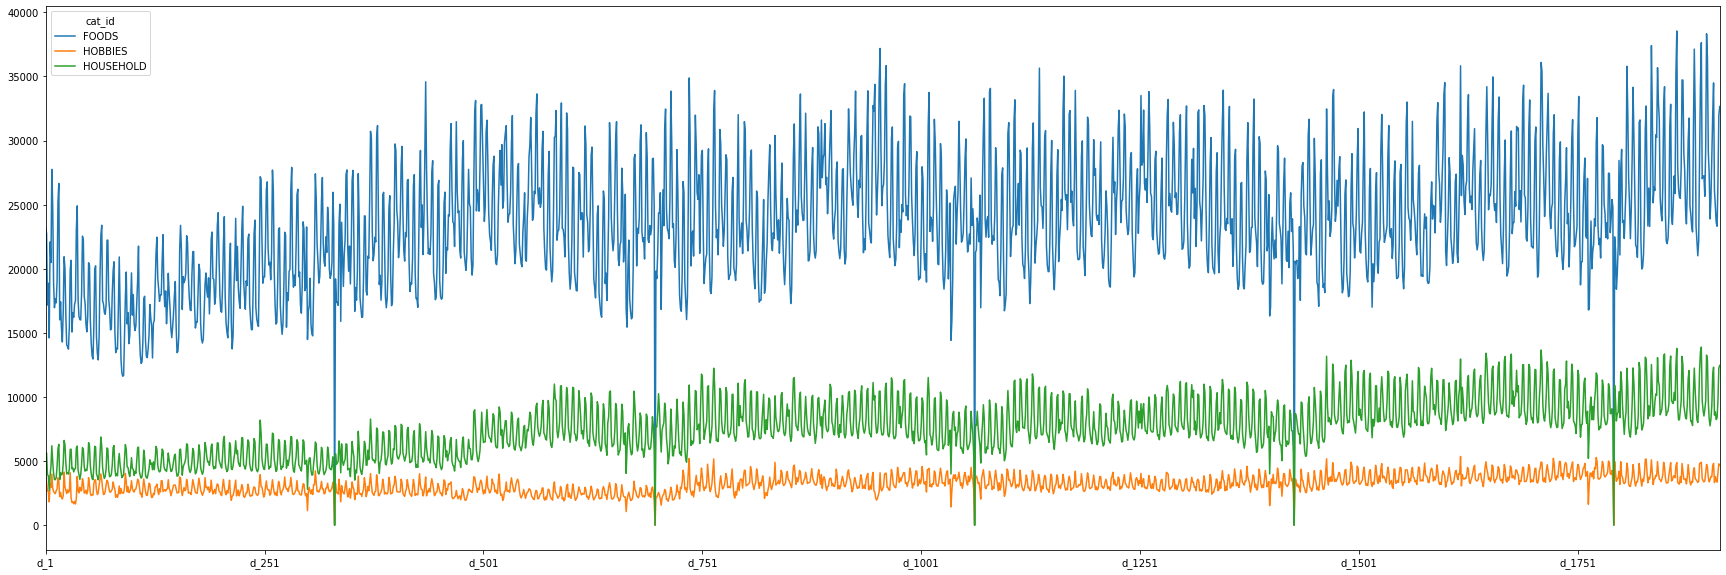

In [18]:
# 不同 cat 每日销量 daily top:food
rcParams['figure.figsize'] = (30,10)
data.groupby("cat_id")[days_cols].sum().transpose().plot()
rcParams['figure.figsize'] = (17,5)

In [49]:
rcParams['figure.figsize'] = (30,10)
data.groupby("item_id")[days_cols].sum().transpose().plot()
rcParams['figure.figsize'] = (17,5)
legend.remove()


KeyError: 'item_id'

> ### item_id cat_id dept_id 影响较大;  state_id影响不大;  从时间轴来看，时间序列与sale 有一定的线性周期变化

# 三表合并
### 每个产品，对应不同日期

In [15]:
# level_cols = data.columns[data.columns.str.contains("d_")==False].values
data_level.head()

,id,item_id,dept_id,cat_id,store_id,state_id
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA


In [72]:
data_days_cols =data_days.stack().reset_index(level=1)
data_days_cols.columns = ['d','sales']
data_days_cols

,d,sales
0,d_1,0
0,d_2,0
0,d_3,0
0,d_4,0
0,d_5,0
...,...,...
30489,d_1909,0
30489,d_1910,0
30489,d_1911,0
30489,d_1912,0


In [74]:
data_days_cols['day_int'] = data_days_cols['d'].apply(lambda day:day.split('_')[1]).astype('int')
data_days_cols.sales = data_days_cols.sales.astype('int')
data_days_cols

,d,sales,day_int
0,d_1,0,1
0,d_2,0,2
0,d_3,0,3
0,d_4,0,4
0,d_5,0,5
...,...,...,...
30489,d_1909,0,1909
30489,d_1910,0,1910
30489,d_1911,0,1911
30489,d_1912,0,1912


In [75]:
data_new = data.drop(days_cols, axis=1).join(data_days_cols)
# data_new = data_new.drop("day",axis=1)
data_new.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d,sales,day_int
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,1
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_2,0,2
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_3,0,3
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_4,0,4
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_5,0,5


In [77]:
data_new.sales = pd.to_numeric(data_new.sales, downcast='unsigned')
data_new.d = data_new.d.astype('category')
data_new.day_int = pd.to_numeric(data_new.day_int, downcast='unsigned')
data_new.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d,sales,day_int
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,1
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_2,0,2
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_3,0,3
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_4,0,4
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_5,0,5


In [78]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58327370 entries, 0 to 30489
Data columns (total 9 columns):
id          category
item_id     category
dept_id     category
cat_id      category
store_id    category
state_id    category
d           category
sales       uint16
day_int     uint16
dtypes: category(7), uint16(2)
memory usage: 1.2 GB


In [108]:
calendar.head()
sell_prices.head()
data.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,3,0,1,1,1,3,0,1,1
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,2,1,1,1,0,1,1,1
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,5,4,1,0,1,3,7,2
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,1,0,1,1,2,2,2,4


In [80]:
data_merge = data_new.merge(calendar, on='d', how='left').merge(sell_prices, on=['store_id','item_id','wm_yr_wk'], how='left')


In [81]:
data_merge.to_csv("merge_data.csv.gz", compression='gzip')

## 加载部分

In [100]:
%%time
# df_final = pd.read_csv('merge_data.csv.gz')

df_final = pd.read_csv('merge_data.csv.gz',nrows=1000000)

CPU times: user 2.83 s, sys: 311 ms, total: 3.14 s
Wall time: 3.2 s


In [187]:
print(data_merged.shape)
data_merged.head()

(1000000, 24)


,Unnamed: 0,id,item_id,dept_id,cat_id,store_id,state_id,d,sales,day_int,...,month,year,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,sell_price
0,0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,1,...,1,2011,NaN,NaN,NaN,NaN,0,0,0,NaN
1,1,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_2,0,2,...,1,2011,NaN,NaN,NaN,NaN,0,0,0,NaN
2,2,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_3,0,3,...,1,2011,NaN,NaN,NaN,NaN,0,0,0,NaN
3,3,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_4,0,4,...,2,2011,NaN,NaN,NaN,NaN,1,1,0,NaN
4,4,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_5,0,5,...,2,2011,NaN,NaN,NaN,NaN,1,0,1,NaN


In [188]:
cols = df_final.columns.tolist()
sales_cols = cols.index('sales')
cols.insert(cols.index('sell_price'), cols.pop(cols.index('sales')))   # cols.index('c')返回'c'在cols的位置信息，
df_final = df_final[cols]
print(cols)
df_final.iloc[:,5:]

['Unnamed: 0', 'id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id', 'd', 'day_int', 'date', 'wm_yr_wk', 'weekday', 'wday', 'month', 'year', 'event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'sell_price', 'sales']


,store_id,state_id,d,day_int,date,wm_yr_wk,weekday,wday,month,year,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,sell_price,sales
0,CA_1,CA,d_1,1,2011-01-29,11101,Saturday,1,1,2011,NaN,NaN,NaN,NaN,0,0,0,NaN,0
1,CA_1,CA,d_2,2,2011-01-30,11101,Sunday,2,1,2011,NaN,NaN,NaN,NaN,0,0,0,NaN,0
2,CA_1,CA,d_3,3,2011-01-31,11101,Monday,3,1,2011,NaN,NaN,NaN,NaN,0,0,0,NaN,0
3,CA_1,CA,d_4,4,2011-02-01,11101,Tuesday,4,2,2011,NaN,NaN,NaN,NaN,1,1,0,NaN,0
4,CA_1,CA,d_5,5,2011-02-02,11101,Wednesday,5,2,2011,NaN,NaN,NaN,NaN,1,0,1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,CA_1,CA,d_1410,1410,2014-12-08,11445,Monday,3,12,2014,NaN,NaN,NaN,NaN,1,0,1,0.5,0
999996,CA_1,CA,d_1411,1411,2014-12-09,11445,Tuesday,4,12,2014,NaN,NaN,NaN,NaN,1,1,1,0.5,0
999997,CA_1,CA,d_1412,1412,2014-12-10,11445,Wednesday,5,12,2014,NaN,NaN,NaN,NaN,1,0,0,0.5,0
999998,CA_1,CA,d_1413,1413,2014-12-11,11445,Thursday,6,12,2014,NaN,NaN,NaN,NaN,0,1,1,0.5,0


In [189]:
df_final.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,1000000.0,499999.500000,288675.278932,0.00,249999.75,499999.50,749999.25,999999.00
day_int,1000000.0,956.647207,552.138188,1.00,479.00,957.00,1435.00,1913.00
wm_yr_wk,1000000.0,11339.094760,150.346580,11101.00,11217.00,11333.00,11448.00,11613.00
wday,1000000.0,3.997390,2.000652,1.00,2.00,4.00,6.00,7.00
month,1000000.0,6.357838,3.458644,1.00,3.00,6.00,9.00,12.00
year,1000000.0,2013.208106,1.531791,2011.00,2012.00,2013.00,2015.00,2016.00
snap_CA,1000000.0,0.329330,0.469970,0.00,0.00,0.00,1.00,1.00
snap_TX,1000000.0,0.329328,0.469969,0.00,0.00,0.00,1.00,1.00
snap_WI,1000000.0,0.329328,0.469969,0.00,0.00,0.00,1.00,1.00
sell_price,809894.0,5.528567,4.937574,0.05,1.97,3.98,7.88,30.98


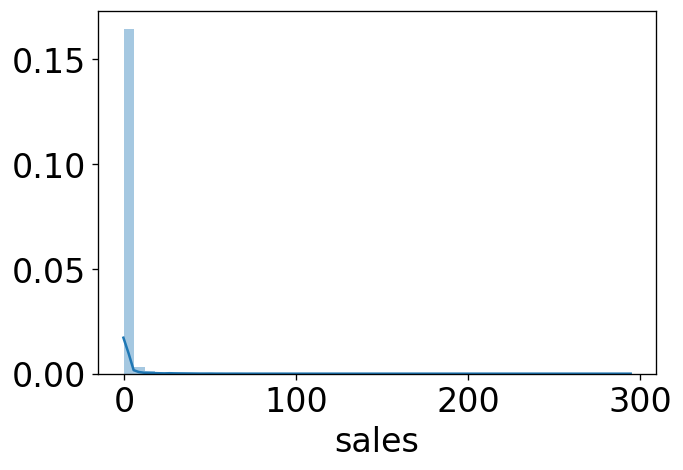

In [143]:
# sns.distplot(data_merged.query('sales < 10').sales)
from scipy.stats import chi2                

# sns.distplot(df_final.sales,rug=True,fit=chi2,
#                  fit_kws={'color':'g'}) # 大部分的时候卖出0件商品

sns.distplot(df_final.sales) # 大部分的时候卖出0件商品

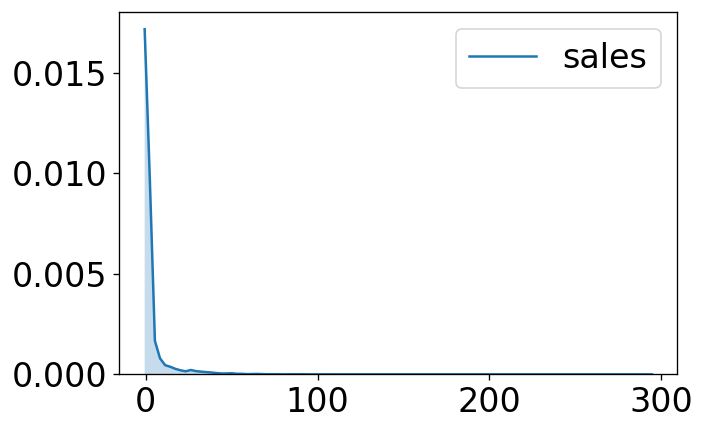

In [144]:
sns.kdeplot(df_final.sales,shade=True)
# sns.kdeplot(data_merged.sales,cumulative=True,shade=True)



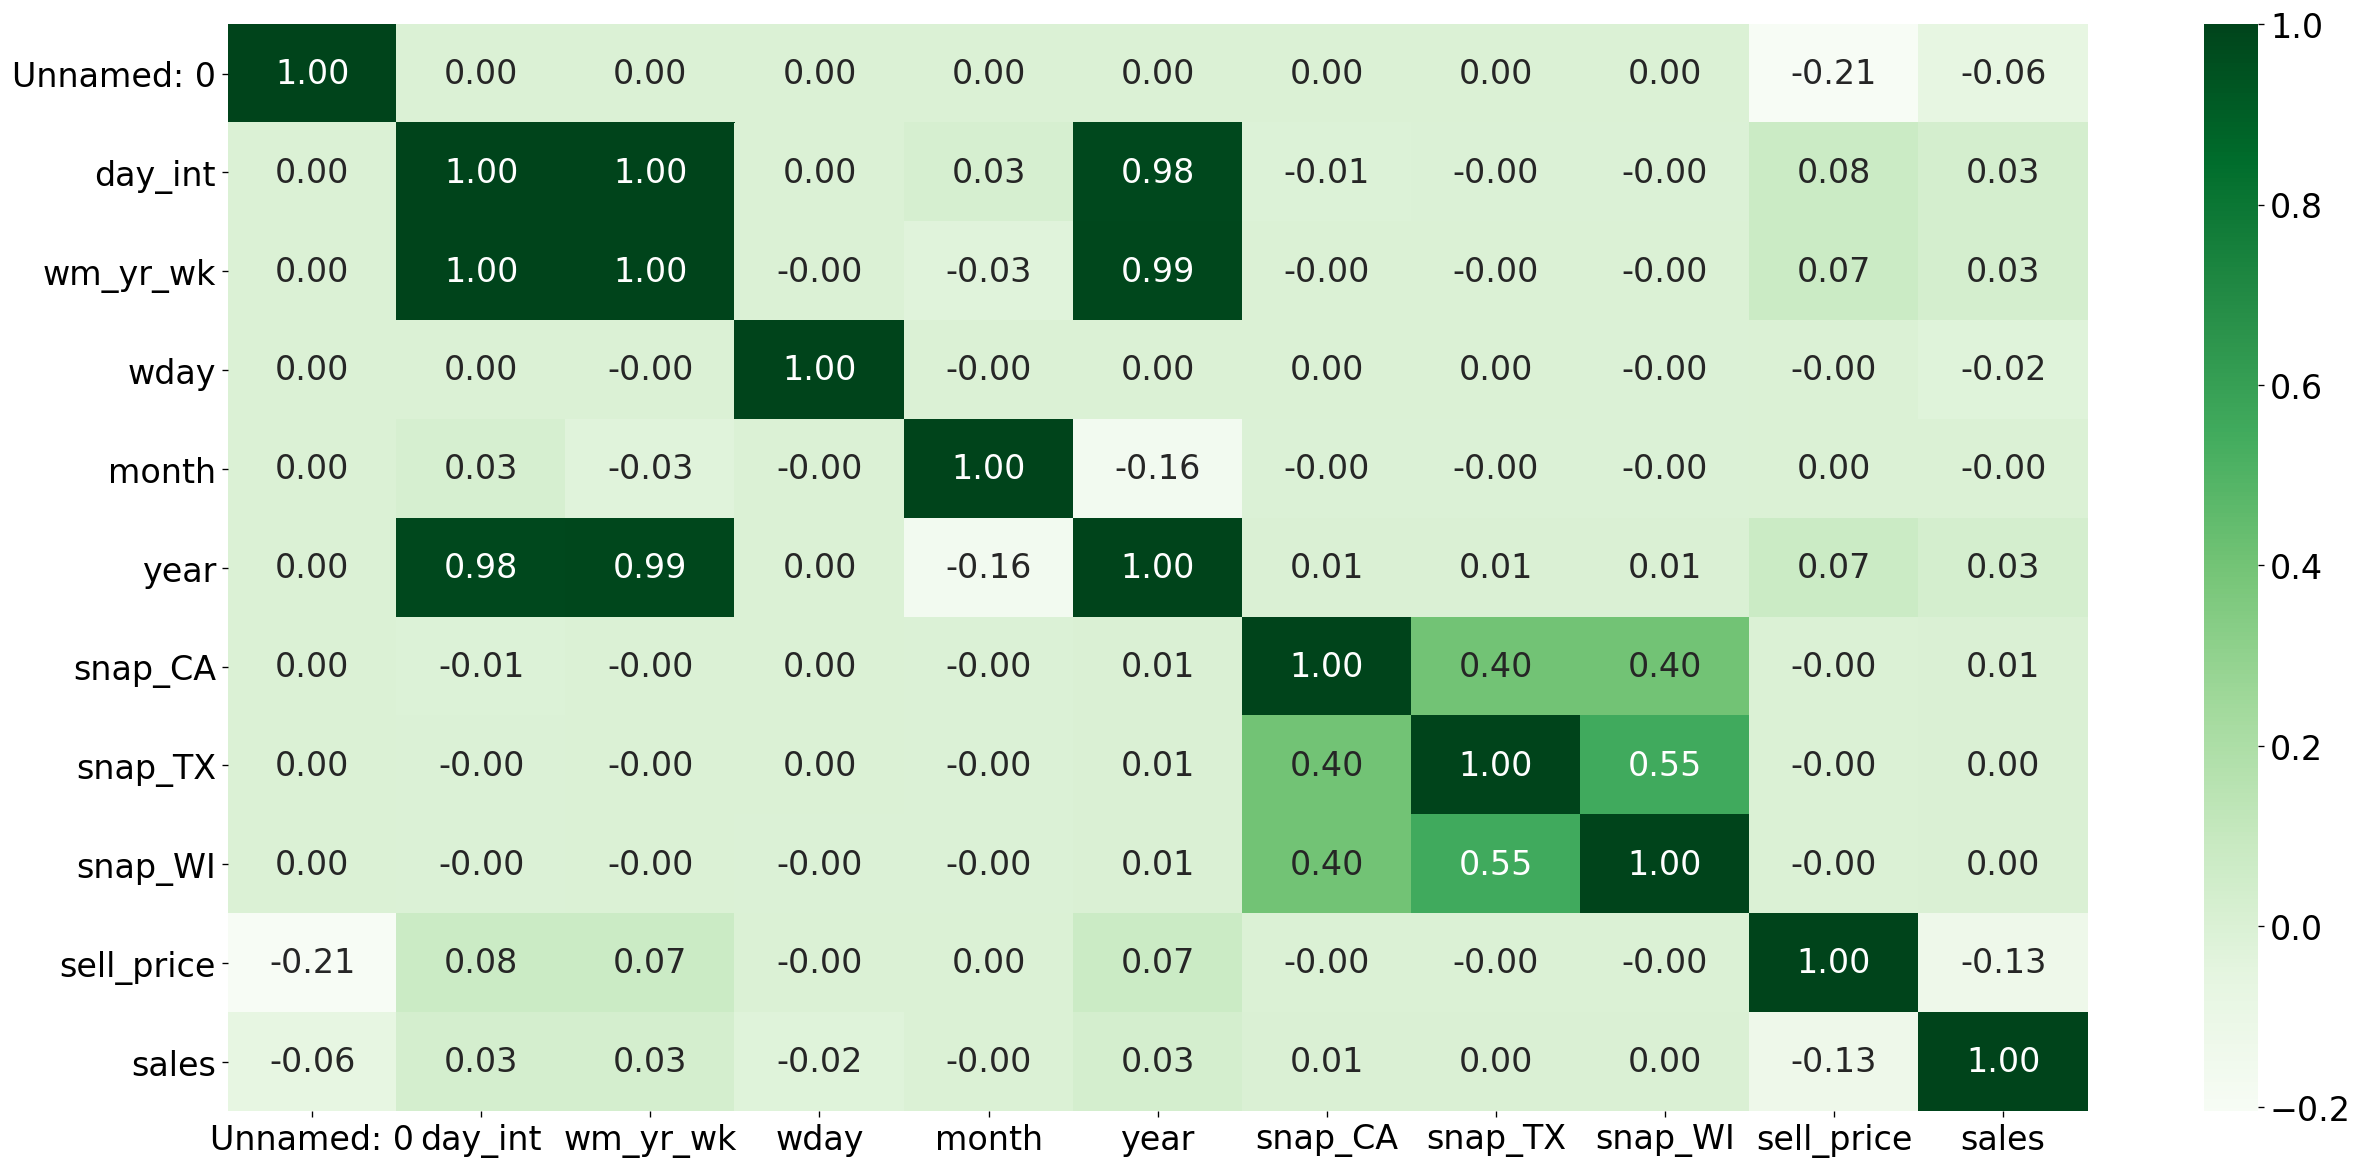

In [145]:
plt.figure(figsize=(25, 12))
sns.heatmap(df_final.corr(), annot=True, fmt=".2f", cmap=plt.cm.Greens)

In [146]:
# scatter_mat=pd.plotting.scatter_matrix(df_final, figsize=(20, 15), diagonal='hist')

In [147]:
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn import svm, preprocessing
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, accuracy_score, classification_report

from keras.models import Model
from keras.layers import Input, Dense, Dropout
from keras.utils import to_categorical

In [148]:
df_final.head()

,Unnamed: 0,id,item_id,dept_id,cat_id,store_id,state_id,d,day_int,date,...,year,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,sell_price,sales
0,0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_1,1,2011-01-29,...,2011,NaN,NaN,NaN,NaN,0,0,0,NaN,0
1,1,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_2,2,2011-01-30,...,2011,NaN,NaN,NaN,NaN,0,0,0,NaN,0
2,2,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_3,3,2011-01-31,...,2011,NaN,NaN,NaN,NaN,0,0,0,NaN,0
3,3,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_4,4,2011-02-01,...,2011,NaN,NaN,NaN,NaN,1,1,0,NaN,0
4,4,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_5,5,2011-02-02,...,2011,NaN,NaN,NaN,NaN,1,0,1,NaN,0


In [149]:
def convert_datetime(x):
    return x.timestamp()

# df_final['date'] = df_final[['date']].applymap(convert_datetime)

# df_final = df_final.drop(['Unnamed: 0'], axis=1)
df_final['date'] =  pd.to_datetime(df_final.date)

In [101]:
df_final.head()

,Unnamed: 0,id,item_id,dept_id,cat_id,store_id,state_id,d,sales,day_int,...,month,year,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,sell_price
0,0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,1,...,1,2011,NaN,NaN,NaN,NaN,0,0,0,NaN
1,1,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_2,0,2,...,1,2011,NaN,NaN,NaN,NaN,0,0,0,NaN
2,2,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_3,0,3,...,1,2011,NaN,NaN,NaN,NaN,0,0,0,NaN
3,3,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_4,0,4,...,2,2011,NaN,NaN,NaN,NaN,1,1,0,NaN
4,4,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_5,0,5,...,2,2011,NaN,NaN,NaN,NaN,1,0,1,NaN


In [103]:
df_final.sell_price =  df_final.sell_price.fillna(value=0)
#If NaN, this means that the product was not sold during the examined week.
df_final

,Unnamed: 0,id,item_id,dept_id,cat_id,store_id,state_id,d,sales,day_int,...,month,year,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,sell_price
0,0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,1,...,1,2011,NaN,NaN,NaN,NaN,0,0,0,0.0
1,1,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_2,0,2,...,1,2011,NaN,NaN,NaN,NaN,0,0,0,0.0
2,2,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_3,0,3,...,1,2011,NaN,NaN,NaN,NaN,0,0,0,0.0
3,3,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_4,0,4,...,2,2011,NaN,NaN,NaN,NaN,1,1,0,0.0
4,4,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_5,0,5,...,2,2011,NaN,NaN,NaN,NaN,1,0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,999995,HOBBIES_2_107_CA_1_validation,HOBBIES_2_107,HOBBIES_2,HOBBIES,CA_1,CA,d_1410,0,1410,...,12,2014,NaN,NaN,NaN,NaN,1,0,1,0.5
999996,999996,HOBBIES_2_107_CA_1_validation,HOBBIES_2_107,HOBBIES_2,HOBBIES,CA_1,CA,d_1411,0,1411,...,12,2014,NaN,NaN,NaN,NaN,1,1,1,0.5
999997,999997,HOBBIES_2_107_CA_1_validation,HOBBIES_2_107,HOBBIES_2,HOBBIES,CA_1,CA,d_1412,0,1412,...,12,2014,NaN,NaN,NaN,NaN,1,0,0,0.5
999998,999998,HOBBIES_2_107_CA_1_validation,HOBBIES_2_107,HOBBIES_2,HOBBIES,CA_1,CA,d_1413,0,1413,...,12,2014,NaN,NaN,NaN,NaN,0,1,1,0.5


In [104]:
df_final.columns

Index(['Unnamed: 0', 'id', 'item_id', 'dept_id', 'cat_id', 'store_id',
       'state_id', 'd', 'sales', 'day_int', 'date', 'wm_yr_wk', 'weekday',
       'wday', 'month', 'year', 'event_name_1', 'event_type_1', 'event_name_2',
       'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'sell_price'],
      dtype='object')

In [105]:
df_final.info(null_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 24 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   Unnamed: 0    1000000 non-null  int64  
 1   id            1000000 non-null  object 
 2   item_id       1000000 non-null  object 
 3   dept_id       1000000 non-null  object 
 4   cat_id        1000000 non-null  object 
 5   store_id      1000000 non-null  object 
 6   state_id      1000000 non-null  object 
 7   d             1000000 non-null  object 
 8   sales         1000000 non-null  int64  
 9   day_int       1000000 non-null  int64  
 10  date          1000000 non-null  object 
 11  wm_yr_wk      1000000 non-null  int64  
 12  weekday       1000000 non-null  object 
 13  wday          1000000 non-null  int64  
 14  month         1000000 non-null  int64  
 15  year          1000000 non-null  int64  
 16  event_name_1  80499 non-null    object 
 17  event_type_1  80499 non-null

In [112]:
df_final["id_f"] = pd.factorize(df_final["id"] )[0].astype(np.uint16)
df_final["item_id_f"] = pd.factorize(df_final["item_id"] )[0].astype(np.uint16)
df_final["dept_id_f"] = pd.factorize(df_final["dept_id"] )[0].astype(np.uint16)
df_final["cat_id_f"] = pd.factorize(df_final["cat_id"] )[0].astype(np.uint16)
df_final["state_id_f"] = pd.factorize(df_final["state_id"] )[0].astype(np.uint16)

df_final["weekday_f"] = pd.factorize(df_final["weekday"] )[0].astype(np.uint16)
df_final

,Unnamed: 0,id,item_id,dept_id,cat_id,store_id,state_id,d,sales,day_int,...,snap_CA,snap_TX,snap_WI,sell_price,id_f,item_id_f,dept_id_f,cat_id_f,state_id_f,weekday_f
0,0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,1,...,0,0,0,0.0,0,0,0,0,0,0
1,1,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_2,0,2,...,0,0,0,0.0,0,0,0,0,0,1
2,2,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_3,0,3,...,0,0,0,0.0,0,0,0,0,0,2
3,3,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_4,0,4,...,1,1,0,0.0,0,0,0,0,0,3
4,4,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_5,0,5,...,1,0,1,0.0,0,0,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,999995,HOBBIES_2_107_CA_1_validation,HOBBIES_2_107,HOBBIES_2,HOBBIES,CA_1,CA,d_1410,0,1410,...,1,0,1,0.5,522,522,1,0,0,2
999996,999996,HOBBIES_2_107_CA_1_validation,HOBBIES_2_107,HOBBIES_2,HOBBIES,CA_1,CA,d_1411,0,1411,...,1,1,1,0.5,522,522,1,0,0,3
999997,999997,HOBBIES_2_107_CA_1_validation,HOBBIES_2_107,HOBBIES_2,HOBBIES,CA_1,CA,d_1412,0,1412,...,1,0,0,0.5,522,522,1,0,0,4
999998,999998,HOBBIES_2_107_CA_1_validation,HOBBIES_2_107,HOBBIES_2,HOBBIES,CA_1,CA,d_1413,0,1413,...,0,1,1,0.5,522,522,1,0,0,5


In [113]:
df_final.columns

Index(['Unnamed: 0', 'id', 'item_id', 'dept_id', 'cat_id', 'store_id',
       'state_id', 'd', 'sales', 'day_int', 'date', 'wm_yr_wk', 'weekday',
       'wday', 'month', 'year', 'event_name_1', 'event_type_1', 'event_name_2',
       'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'sell_price', 'id_f',
       'item_id_f', 'dept_id_f', 'cat_id_f', 'state_id_f', 'weekday_f'],
      dtype='object')

In [114]:
# useless_cols = ['id','item_id','dept_id','cat_id','store_id','state_id','demand','date','demand_month_min']
linreg_train_cols = ['id_f', 'item_id_f', 'dept_id_f', 'cat_id_f', 'state_id_f',
                     'day_int','wm_yr_wk', 'weekday_f', 'wday','month', 'year', 
                     'sell_price']
linreg_train_cols


['id_f',
 'item_id_f',
 'dept_id_f',
 'cat_id_f',
 'state_id_f',
 'day_int',
 'wm_yr_wk',
 'weekday_f',
 'wday',
 'month',
 'year',
 'sell_price']

In [115]:
X = df_final[linreg_train_cols]
X
# X.fillna(value=0,inplace=True)


,id_f,item_id_f,dept_id_f,cat_id_f,state_id_f,day_int,wm_yr_wk,weekday_f,wday,month,year,sell_price
0,0,0,0,0,0,1,11101,0,1,1,2011,0.0
1,0,0,0,0,0,2,11101,1,2,1,2011,0.0
2,0,0,0,0,0,3,11101,2,3,1,2011,0.0
3,0,0,0,0,0,4,11101,3,4,2,2011,0.0
4,0,0,0,0,0,5,11101,4,5,2,2011,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
999995,522,522,1,0,0,1410,11445,2,3,12,2014,0.5
999996,522,522,1,0,0,1411,11445,3,4,12,2014,0.5
999997,522,522,1,0,0,1412,11445,4,5,12,2014,0.5
999998,522,522,1,0,0,1413,11445,5,6,12,2014,0.5


In [116]:
X.info(null_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 12 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   id_f        1000000 non-null  uint16 
 1   item_id_f   1000000 non-null  uint16 
 2   dept_id_f   1000000 non-null  uint16 
 3   cat_id_f    1000000 non-null  uint16 
 4   state_id_f  1000000 non-null  uint16 
 5   day_int     1000000 non-null  int64  
 6   wm_yr_wk    1000000 non-null  int64  
 7   weekday_f   1000000 non-null  uint16 
 8   wday        1000000 non-null  int64  
 9   month       1000000 non-null  int64  
 10  year        1000000 non-null  int64  
 11  sell_price  1000000 non-null  float64
dtypes: float64(1), int64(5), uint16(6)
memory usage: 57.2 MB


In [117]:
y = df_final['sales']
y

0         0
1         0
2         0
3         0
4         0
         ..
999995    0
999996    0
999997    0
999998    0
999999    0
Name: sales, Length: 1000000, dtype: int64

In [10]:
# X.to_csv("X.csv.gz", compression='gzip')


In [11]:
# y.to_csv("y.csv.gz", compression='gzip')


## trainning

In [2]:
X = pd.read_csv('X.csv.gz',nrows=1000000)
y = pd.read_csv('y.csv.gz',nrows=1000000)

y = np.array(y)


In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

pca.components_ (1, 13)
pca_var_ratio (1,)


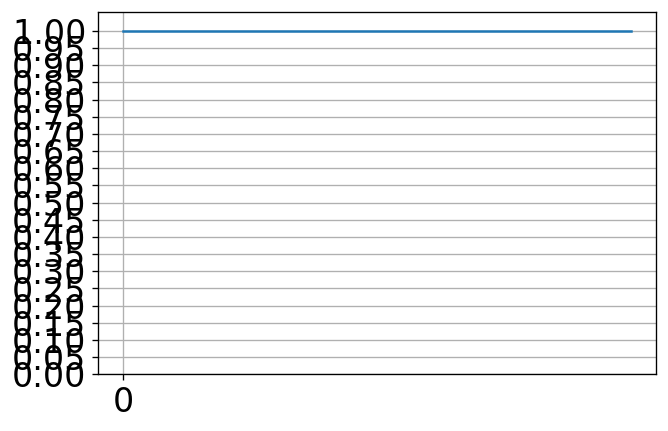

CPU times: user 1.98 s, sys: 159 ms, total: 2.14 s
Wall time: 786 ms


In [4]:
%%time
from sklearn.decomposition import PCA

pca=PCA(n_components=0.95)
pca.fit(X,y)
ratio=pca.explained_variance_ratio_
print("pca.components_",pca.components_.shape)
print("pca_var_ratio",pca.explained_variance_ratio_.shape)
plt.plot([i for i in range(X.shape[1])],[np.sum(ratio[:i+1]) for i in range(X.shape[1])])
plt.xticks(np.arange(X.shape[1],step=1000))
plt.yticks(np.arange(0,1.01,0.05))
plt.grid()
plt.show()

In [5]:
def pca(X):
    target_dim = ratio.shape[0]
    pca_target=PCA(n_components=target_dim)
    reduced_X = pca_target.fit_transform(X)
    print(reduced_X.shape )
    return reduced_X

In [6]:
%%time
X_train_reduce = pca(X_train)
X_test_reduce =  pca(X_test)


(700000, 1)
(300000, 1)
CPU times: user 8.65 s, sys: 540 ms, total: 9.19 s
Wall time: 2.42 s


In [7]:
X_train

,Unnamed: 0,id_f,item_id_f,dept_id_f,cat_id_f,state_id_f,day_int,wm_yr_wk,weekday_f,wday,month,year,sell_price
823666,823666,430,430,1,0,0,1077,11350,5,6,1,2014,3.47
70066,70066,36,36,0,0,0,1199,11415,1,2,5,2014,12.97
591943,591943,309,309,0,0,0,827,11315,0,1,5,2013,0.00
578645,578645,302,302,0,0,0,920,11328,2,3,8,2013,0.00
675461,675461,353,353,0,0,0,173,11125,4,5,7,2011,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
963395,963395,503,503,1,0,0,1157,11409,1,2,3,2014,2.77
117952,117952,61,61,0,0,0,1260,11423,6,7,7,2014,5.47
435829,435829,227,227,0,0,0,1579,11517,3,4,5,2015,12.98
305711,305711,159,159,0,0,0,1545,11512,4,5,4,2015,8.97


In [8]:
X_train = StandardScaler().fit(X_train).transform(X_train)
X_test = StandardScaler().fit(X_test).transform(X_test)


In [9]:
# linreg = LinearRegression()
poly_reg = Pipeline([
#     ('poly',PolynomialFeatures(degree=1)),
    ('poly',PolynomialFeatures(degree=2)),
    ('std_scaler',StandardScaler()),
    ('lin_reg',LinearRegression())
])
poly_reg.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('poly',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=False, order='C')),
                ('std_scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('lin_reg',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [10]:
y_train_predict = poly_reg.predict(X_train)
print('Mean squared error: %.2f'% mean_squared_error(y_train, y_train_predict))
print('Coefficient of determination: %.2f'% r2_score(y_train, y_train_predict))
y_test_predict = poly_reg.predict(X_test)
print('Mean squared error: %.2f'  % mean_squared_error(y_test, y_test_predict))
print('Coefficient of determination: %.2f'% r2_score(y_test, y_test_predict))

Mean squared error: 4.09
Coefficient of determination: 0.52
Mean squared error: 2954007723456325632.00
Coefficient of determination: -336689203264933696.00


In [14]:
best_score = 0.0
best_k = 0
best_weights = ''
best_metric =''

weights = ['uniform','distance']
metric = ['minkowski','euclidean','manhattan','chebyshev']
# weights = ['uniform']
# metric = ['minkowski']
for weight in weights:
    
    for metr in metric:

        for k in range(3, 6):
            knn_r = KNeighborsRegressor(algorithm='auto', leaf_size=30, metric= metr,
                   metric_params=None, n_jobs=None, n_neighbors=k, p=1,
                   weights= weight )

            knn_r.fit(X_train,y_train)
            y_train_predict = knn_r.predict(X_train)
            score = r2_score(y_train,y_train_predict)
            if score > best_score :
                best_score = score
                best_k = k
                best_metric = metr
                best_weights = weight

print('best_score:',best_score)
print('best_k:',best_k)
print('best_metric:',best_metric)
print('best_weights:',best_weights)

best_score: 1.0
best_k: 3
best_metric: minkowski
best_weights: distance


In [15]:
knn_r = KNeighborsRegressor( metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=1,
           weights='distance',
                          )
knn_r.fit(X_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=1,
                    weights='distance')

In [16]:
y_train_predict = knn_r.predict(X_train)
print('Mean squared error: %.2f'% mean_squared_error(y_train, y_train_predict))
print('Coefficient of determination: %.2f'% r2_score(y_train, y_train_predict))
knn_r.score(X_train, y_train)
y_test_predict = knn_r.predict(X_test)
print('Mean squared error: %.2f'  % mean_squared_error(y_test, y_test_predict))
print('Coefficient of determination: %.2f'% r2_score(y_test, y_test_predict))
knn_r.score(X_test, y_test)

Mean squared error: 0.00
Coefficient of determination: 1.00
Mean squared error: 1371360.61
Coefficient of determination: 0.58


0.9999670674900452

## RNN


In [17]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.layers import Flatten,Conv1D,GlobalMaxPooling1D,MaxPooling1D,GlobalAveragePooling1D,Input,MaxPool1D,BatchNormalization
from keras.layers import Embedding,SimpleRNN
from keras.layers.recurrent import SimpleRNN


Using TensorFlow backend.


In [47]:
data_days_sales = pd.read_csv('data_days_sales.csv.gz')
data_days_sales.head()

,Unnamed: 0,0
0,d_1,32631
1,d_2,31749
2,d_3,23783
3,d_4,25412
4,d_5,19146


In [46]:
import torch
from torch import nn

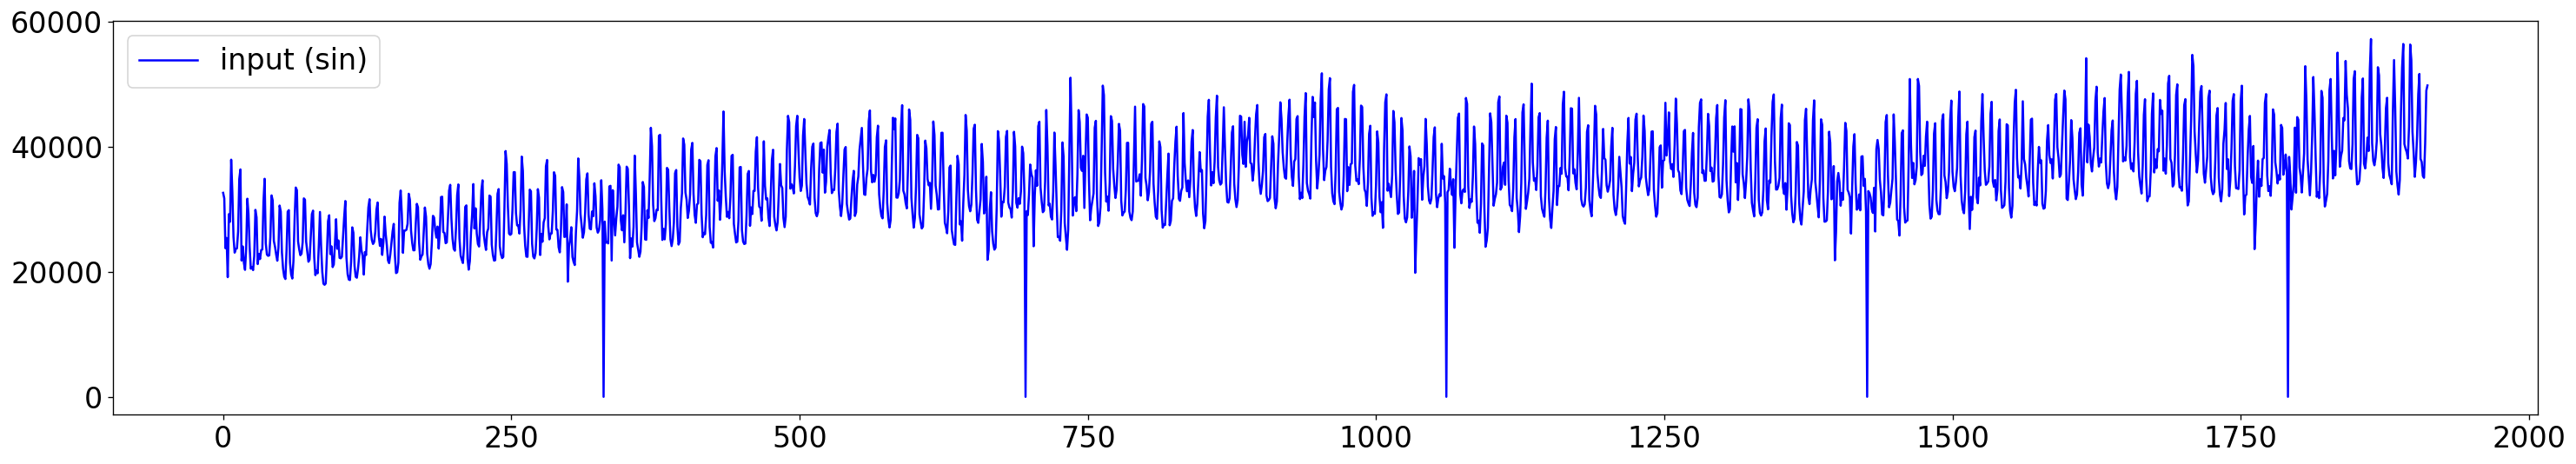

RangeIndex(start=0, stop=1913, step=1)

In [56]:
TIME_STEP = 10  # rnn time step
INPUT_SIZE = 1  # rnn input size
LR = 0.02  # learning rate
 
# show data
# steps = np.linspace(0, np.pi * 2, 100, dtype=np.float32)  # float32 for converting torch FloatTensor
x_np = data_days_sales.index
y_np = data_days_sales['0']
# plt.plot(steps, y_np, 'r-', label='target (cos)')
plt.plot(x_np, y_np, 'b-', label='input (sin)')
plt.legend(loc='best')
plt.show()


In [63]:
x_np = np.array(x_np )
y_np = np.array(y_np )
y_np

array([32631, 31749, 23783, ..., 40517, 48962, 49795])

In [72]:
x_np.shape
y_np.shape

(1913,)

In [65]:
import numpy as np
np.random.seed(1337)
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Activation
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense


In [73]:
X_train, X_test, Y_train, Y_test = train_test_split(x_np, y_np, test_size=0.33, random_state=42)


In [74]:
neurons = 128
activation_function = 'relu'   # 激活函数
loss = 'mse'  # 损失函数
optimizer="adam"  # 优化函数
dropout = 0.25

In [93]:
model = Sequential()
 
model.add(LSTM(neurons, return_sequences=True, input_shape=(1, 1), activation=activation_function))
model.add(Dropout(dropout))
model.add(LSTM(neurons, return_sequences=True, activation=activation_function))
model.add(Dropout(dropout))
model.add(LSTM(neurons, activation=activation_function))
model.add(Dropout(dropout))
model.add(Dense(output_dim=1, input_dim=1))
#
model.compile(loss=loss, optimizer=optimizer)

In [94]:
# X_train[:, np.newaxis, np.newaxis]

In [95]:
# history = model.fit(X_train[:, np.newaxis, np.newaxis], y_train,
#                     batch_size=128, epochs=10, 
# #                     validation_data=(X_test[:, np.newaxis, np.newaxis], y_test)
#                    )

In [97]:
# training 训练
print('Training -----------')
epochs = 2001
for step in range(epochs):
    cost = model.train_on_batch(X_train[:, np.newaxis, np.newaxis], Y_train)
    if step % 100 == 0:
        print(f'{step} train cost: ', cost)

Training -----------
0 train cost:  1214286000.0
100 train cost:  1213609500.0
200 train cost:  1212924800.0
300 train cost:  1212253000.0
400 train cost:  1211578400.0
500 train cost:  1210901500.0
600 train cost:  1210228400.0
700 train cost:  1209557900.0
800 train cost:  1208886700.0
900 train cost:  1208211700.0
1000 train cost:  1207544300.0
1100 train cost:  1206867800.0
1200 train cost:  1206205300.0
1300 train cost:  1205533700.0
1400 train cost:  1204867000.0
1500 train cost:  1204204000.0
1600 train cost:  1203529900.0
1700 train cost:  1202866300.0
1800 train cost:  1202199600.0
1900 train cost:  1201534500.0
2000 train cost:  1200864000.0


In [ ]:
# 测试
print('Testing ------------')
cost = model.evaluate(X_test[:, np.newaxis, np.newaxis], Y_test, batch_size=40)
print('test cost:', cost)

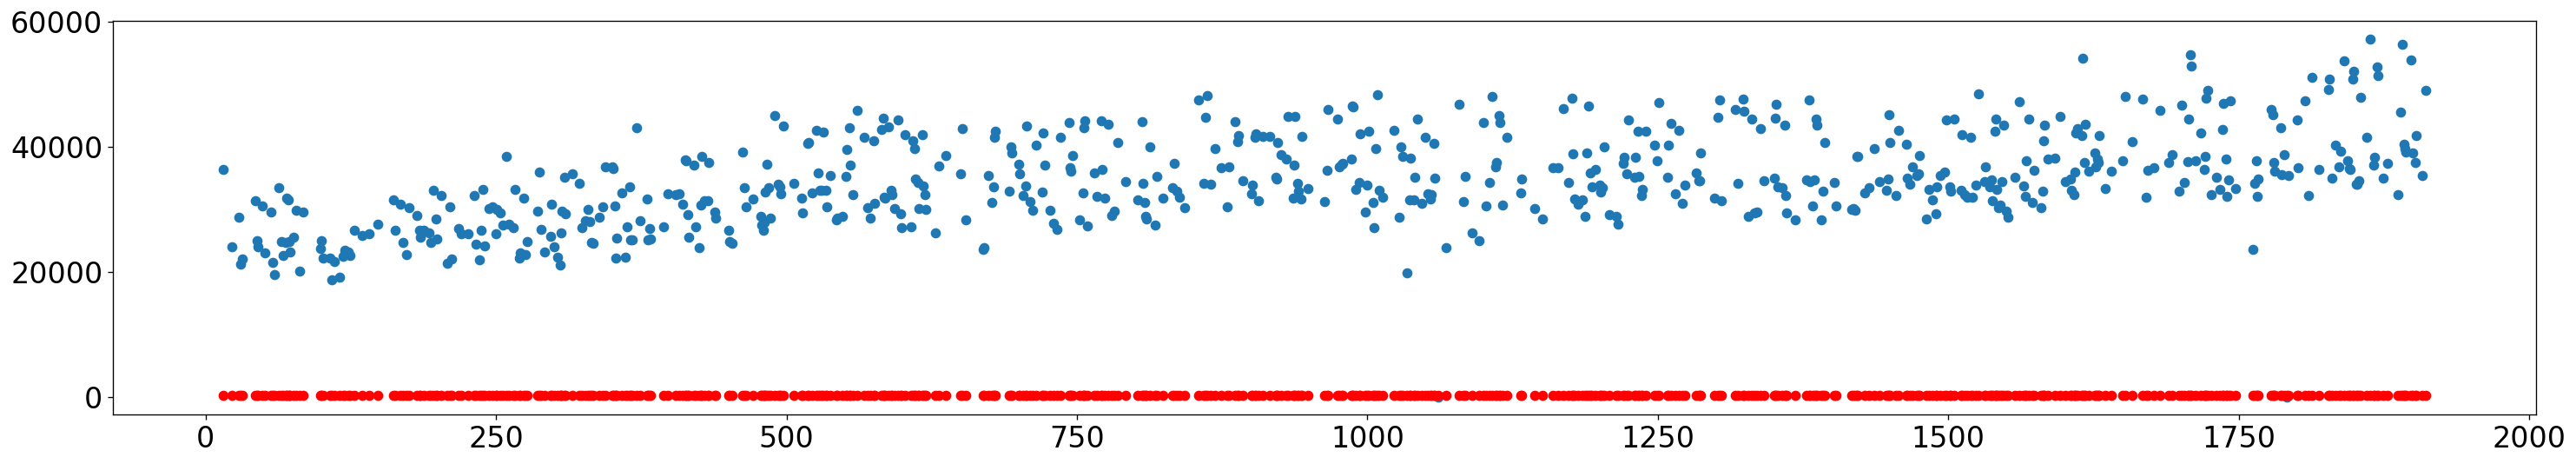

In [78]:
Y_pred = model.predict(X_test[:, np.newaxis, np.newaxis])

plt.scatter(X_test, Y_test)
plt.plot(X_test, Y_pred, 'ro')
plt.show()
